In [97]:
import os
import numpy as np
import pandas as pd
import csv
from datetime import datetime
from sklearn.metrics import r2_score
import seaborn as sns
import statsmodels.api as sm


from definitions import target_var, country_col, date_col, save_output, fake_num, show_plots, save_figs,fig_size 
from util_general import get_table_path, get_impl_date, get_trans, get_donor_countries
from plot_functions import plot_predictions, plot_diff, plot_cumsum, plot_cumsum_impl, plot_qq
from statistical_tests import shapiro_wilk_test, t_test_result

# custom functions
from definitions import all_paths, country_col, year_col, stat, incl_countries, incl_years, model_val
from util_general import read_data, validate_input, get_trans, get_data_path, get_impl_date
from estimators import arco, sc, did

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from sklearn.linear_model import Lasso
from definitions import fig_size, show_plots, save_figs, treatment_countries
from util_general import get_impl_date, get_fig_path, get_formal_title, get_model_color, get_formal_country_name

from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import coint

# RF

In [98]:
treatment_country = 'portugal'
country = ['spain co2', 'czech_republic gdp', 'czech_republic pop', 'lithuania infl', 'bulgaria pop', 'lithuania gdp', 'belgium pop']
coefs = [0.8375705556044677, 0.048883040648991266, 0.02893202260256934, 0.023253430784886373, 0.022972055087755454, 0.022508761242600157, 0.015880134028729682]
y_pos = np.arange(len(country))

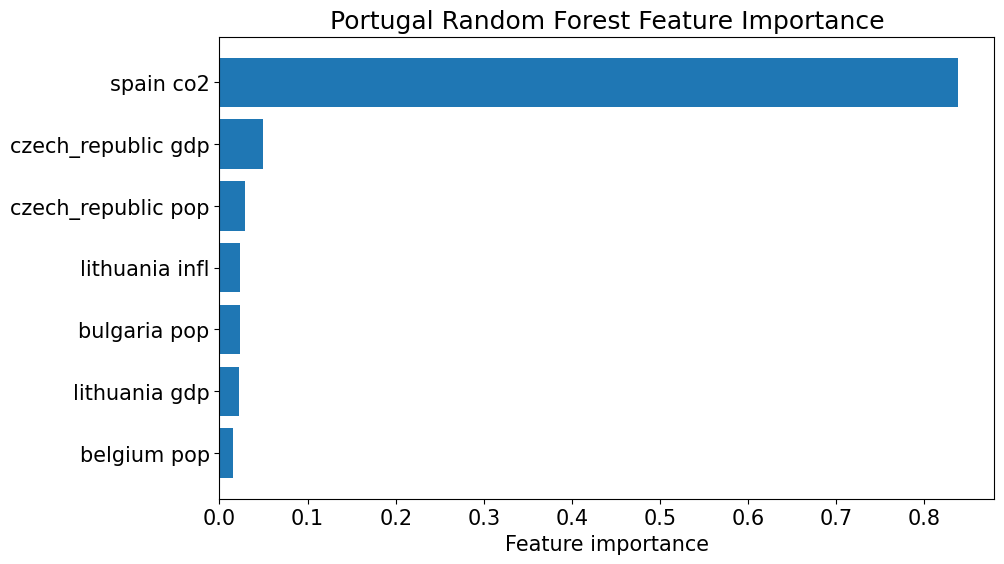

In [99]:
fig, ax = plt.subplots(figsize=fig_size)

ax.barh(country, coefs, align='center')
ax.set_yticks(y_pos, labels=country)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature importance')
ax.set_title(f'{get_formal_country_name(treatment_country)} Random Forest Feature Importance')

if save_figs:
    plt.savefig(f'rf_{treatment_country}_feat_imp.png', dpi=300, bbox_inches='tight')
if show_plots:
    plt.show()

# SC

In [100]:
treatment_country = 'switzerland'
country = ['spain co2', 'czech_republic gdp', 'czech_republic pop', 'lithuania infl', 'bulgaria pop', 'lithuania gdp', 'belgium pop']
coefs = [0.8375705556044677, 0.048883040648991266, 0.02893202260256934, 0.023253430784886373, 0.022972055087755454, 0.022508761242600157, 0.015880134028729682]
y_pos = np.arange(len(country))